# Hypothesis Testing: Goals in Men's and Women's World Cup Matches

This notebook compares the number of goals scored per match in men's and women's FIFA World Cup games using statistical hypothesis testing.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import pingouin


## Men's World Cup Matches


In [2]:
mens = pd.read_csv("../data/men_results.csv")

# Initial data exploration
print(mens.head())
print(mens.info())
print(mens.describe())
print(mens.isna().any())
print(mens["tournament"].unique())


   Unnamed: 0        date home_team away_team  home_score  away_score  \
0           0  1872-11-30  Scotland   England           0           0   
1           1  1873-03-08   England  Scotland           4           2   
2           2  1874-03-07  Scotland   England           2           1   
3           3  1875-03-06   England  Scotland           2           2   
4           4  1876-03-04  Scotland   England           3           0   

  tournament  
0   Friendly  
1   Friendly  
2   Friendly  
3   Friendly  
4   Friendly  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dty

In [3]:
mens["date"] = pd.to_datetime(mens["date"], errors="coerce")

mens_fwc = mens[
    (mens["tournament"].isin(["FIFA World Cup"])) &
    (mens["date"] > "2002-01-01")
].sort_values(by="date")

mens_fwc["total_goals"] = mens_fwc["home_score"] + mens_fwc["away_score"]
print(mens_fwc.head())


       Unnamed: 0       date            home_team     away_team  home_score  \
25164       25164 2002-05-31               France       Senegal           0   
25165       25165 2002-06-01              Germany  Saudi Arabia           8   
25166       25166 2002-06-01  Republic of Ireland      Cameroon           1   
25167       25167 2002-06-01              Uruguay       Denmark           1   
25168       25168 2002-06-02            Argentina       Nigeria           1   

       away_score      tournament  total_goals  
25164           1  FIFA World Cup            1  
25165           0  FIFA World Cup            8  
25166           1  FIFA World Cup            2  
25167           2  FIFA World Cup            3  
25168           0  FIFA World Cup            1  


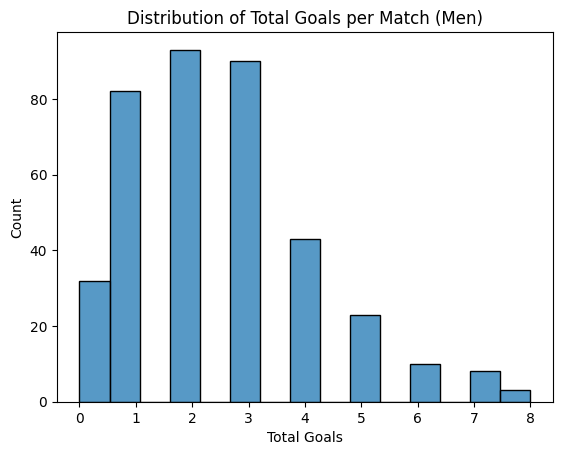

In [4]:
sns.histplot(data=mens_fwc, x="total_goals")
plt.title("Distribution of Total Goals per Match (Men)")
plt.xlabel("Total Goals")
plt.show()


### Normality Test (Men)

The Shapiro–Wilk test is applied to assess whether the distribution of total goals follows a normal distribution.


In [5]:
stat, p_value = shapiro(mens_fwc["total_goals"])

print("W statistic:", stat)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Fail to reject H0 → data appear normally distributed.")
else:
    print("Reject H0 → data are NOT normally distributed.")


W statistic: 0.9266493059134338
p-value: 8.894989197030093e-13
Reject H0 → data are NOT normally distributed.


## Women's World Cup Matches


In [6]:
womens = pd.read_csv("../data/women_results.csv")

# Initial data exploration
print(womens.head())
print(womens.info())
print(womens.describe())
print(womens.isna().any())
print(womens["tournament"].unique())


   Unnamed: 0        date home_team  away_team  home_score  away_score  \
0           0  1969-11-01     Italy     France           1           0   
1           1  1969-11-01   Denmark    England           4           3   
2           2  1969-11-02   England     France           2           0   
3           3  1969-11-02     Italy    Denmark           3           1   
4           4  1975-08-25  Thailand  Australia           3           2   

         tournament  
0              Euro  
1              Euro  
2              Euro  
3              Euro  
4  AFC Championship  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-null   int64 
 1   date        4884 non-null   object
 2   home_team   4884 non-null   object
 3   away_team   4884 non-null   object
 4   home_score  4884 non-null   int64 
 5   away_score  4884 non-null   int6

In [7]:
womens["date"] = pd.to_datetime(womens["date"], errors="coerce")

womens_fwc = womens[
    (womens["tournament"].isin(["FIFA World Cup"])) &
    (womens["date"] > "2002-01-01")
].sort_values(by="date")

womens_fwc["total_goals"] = womens_fwc["home_score"] + womens_fwc["away_score"]
print(womens_fwc.head())


      Unnamed: 0       date      home_team    away_team  home_score  \
1600        1600 2003-09-20        Nigeria  North Korea           0   
1601        1601 2003-09-20         Norway       France           2   
1602        1602 2003-09-20        Germany       Canada           4   
1603        1603 2003-09-20          Japan    Argentina           6   
1604        1604 2003-09-21  United States       Sweden           3   

      away_score      tournament  total_goals  
1600           3  FIFA World Cup            3  
1601           0  FIFA World Cup            2  
1602           1  FIFA World Cup            5  
1603           0  FIFA World Cup            6  
1604           1  FIFA World Cup            4  


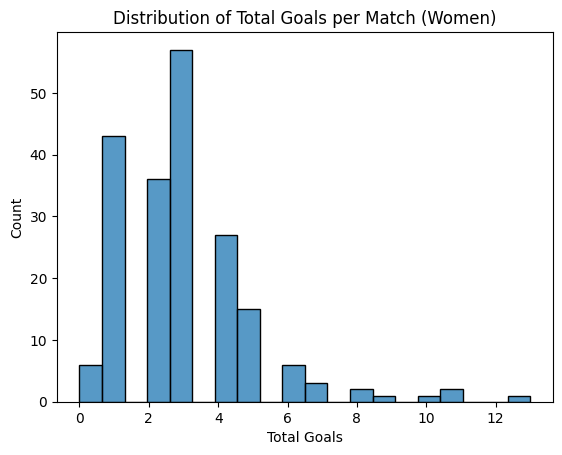

In [8]:
sns.histplot(data=womens_fwc, x="total_goals")
plt.title("Distribution of Total Goals per Match (Women)")
plt.xlabel("Total Goals")
plt.show()


### Normality Test (Women)


In [9]:
stat, p_value = shapiro(womens_fwc["total_goals"])

print("W statistic:", stat)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Fail to reject H0 → data appear normally distributed.")
else:
    print("Reject H0 → data are NOT normally distributed.")


W statistic: 0.8491019332746058
p-value: 3.8908293844628985e-13
Reject H0 → data are NOT normally distributed.


## Hypothesis Testing

Since normality is rejected for both datasets, a non-parametric test is used.

### Hypotheses

- **H0**: The mean number of goals scored in women's international soccer matches is the same as men's.
- **H1**: The mean number of goals scored in women's international soccer matches is greater than men's.


In [10]:
alpha = 0.1

test_mwu = pingouin.mwu(
    x=womens_fwc["total_goals"],
    y=mens_fwc["total_goals"],
    alternative="greater"
)

print(test_mwu)

p_val = test_mwu["p-val"].iloc[0]
print("p-value:", p_val)

result = "reject"
result_dict = {"p_val": p_val, "result": result}

print(result_dict)


       U-val alternative     p-val       RBC      CLES
MWU  43273.0     greater  0.005107  0.126901  0.563451
p-value: 0.005106609825443641
{'p_val': np.float64(0.005106609825443641), 'result': 'reject'}


## Conclusion

Normality was rejected for both men's and women's goal distributions.  
A Mann–Whitney U test was therefore applied.

Results indicate that women's World Cup matches tend to have a higher number of goals per match than men's matches.
